In [122]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
N = 20

In [125]:
def beta_dist(alpha, beta):
    beta_rv = sts.beta(alpha, beta)
    x_arr = np.arange(0, 1, 0.001)
    plt.ylim([0, 2.5])
    plt.plot(x_arr, beta_rv.pdf(x_arr))

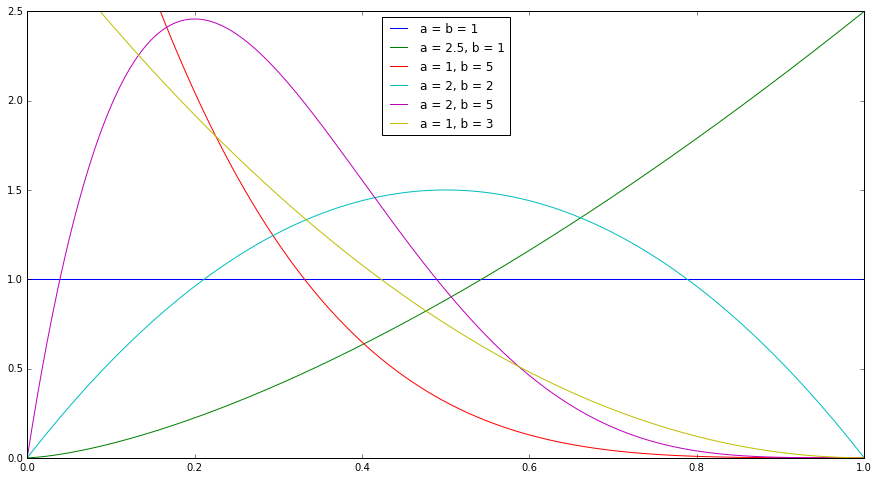

In [126]:
plt.figure(figsize = (15, 8))
beta_dist(1, 1)
beta_dist(2.5, 1)
beta_dist(1, 5)
beta_dist(2, 2)
beta_dist(2, 5)
beta_dist(1, 3)
plt.legend(['a = b = 1', 'a = 2.5, b = 1', 'a = 1, b = 5', 'a = 2, b = 2', 'a = 2, b = 5', 'a = 1, b = 3'], loc = 0)

### Значения параметров гамма распределения можно рассматривать как то, что мы провели $ \large \alpha + \beta$ испытаний и $\alpha$ из них завершились выпадением орла, а $\beta$ - решки. Голубой график с $ \large \alpha = 2, \beta = 2$ можно охарактеризовать, как "честную" монету. Желтый, красный и фиолетовый графики стоит отнести "нечестной" монете с частым выпадением решки, а зеленый - с выпадением орла.

In [141]:
def mark_bayes(p, alpha1, beta1, alpha2, beta2, alpha3, beta3):
    bern_rv = sts.bernoulli(p)
    X = bern_rv.rvs(N)
    mark_1 = np.array([(alpha1 + np.sum(X[:n + 1])) * 1.0 / (alpha1 + beta1 + n + 1) for n in range(N)])
    mark_2 = np.array([(alpha2 + np.sum(X[:n + 1])) * 1.0 / (alpha2 + beta2 + n + 1) for n in range(N)])
    mark_3 = np.array([(alpha3 + np.sum(X[:n + 1])) * 1.0 / (alpha3 + beta3 + n + 1) for n in range(N)])
    mark_4 = np.array([np.sum(X[:n + 1]) * 1.0 / (n + 1) for n in range(N)])
    plt.plot(np.arange(N), abs(mark_1 - p))
    plt.plot(np.arange(N), abs(mark_2 - p))
    plt.plot(np.arange(N), abs(mark_3 - p))
    plt.plot(np.arange(N), abs(mark_4 - p))
    plt.title('p = ' + str(p))
    plt.legend(['(' + str(alpha1) + ',' + str(beta1) + ')', '(' + str(alpha2) + ',' + str(beta2) + ')', '(' 
                + str(alpha3) + ',' + str(beta3) + ')', 'VT'], loc = 0)

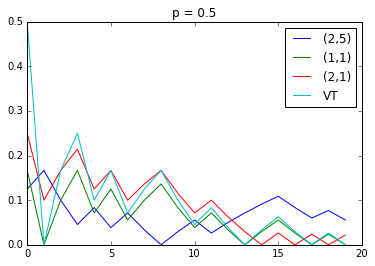

In [143]:
mark_bayes(0.5, 2, 5, 1, 1, 2, 1)

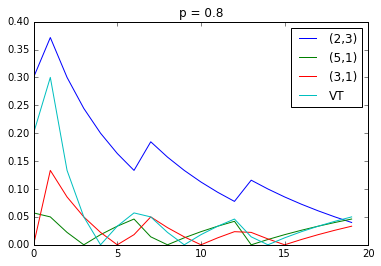

In [144]:
mark_bayes(0.8, 2, 3, 5, 1, 3, 1)

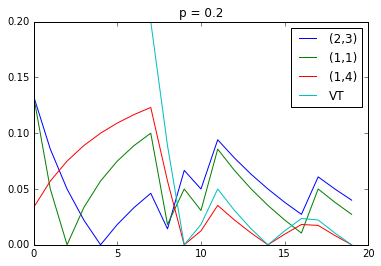

In [145]:
mark_bayes(0.2, 2, 3, 1, 1, 1, 4)

### Наши ожидания насчет параметров бета-распределения оправдались! Оценка выглядит лучше других, если мы берем альфа и бета соответствующие нашей вероятности.